<a href="https://colab.research.google.com/github/narunkumar47/Medical-insurance-cost-predictor/blob/main/Project_on_Medical_Insurance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing Dependicies


In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

Data Collection and Analysis

In [15]:
# loading the data from csv file to Pandas Data frame
insurance_dataset = pd.read_csv('/content/insurance.csv')

In [16]:
# First 5 rows of the dataframe
insurance_dataset.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [17]:
# The number of rows and columns
insurance_dataset.shape

(1338, 7)

In [18]:
#Getting some informations about the dataset
insurance_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


We  have 3 Catogerical Features
1.Sex
2.Smoker
3.Region

In [19]:
#Checking for missing values
insurance_dataset.isnull().sum()

,0
age,0
sex,0
bmi,0
children,0
smoker,0
region,0
charges,0


Data Analysis

In [20]:
3 # Statistical Measures of the DataSet
insurance_dataset.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


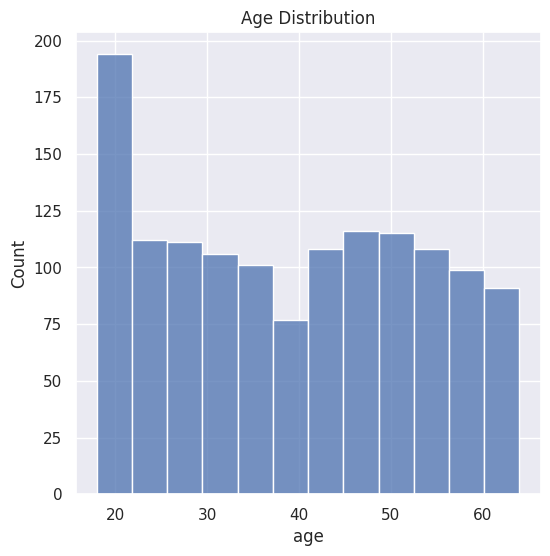

In [47]:
# Distribution of age value
sns.set()
plt.figure(figsize=(6,6))
sns.histplot(insurance_dataset['age'])
plt.title('Age Distribution')
plt.show()

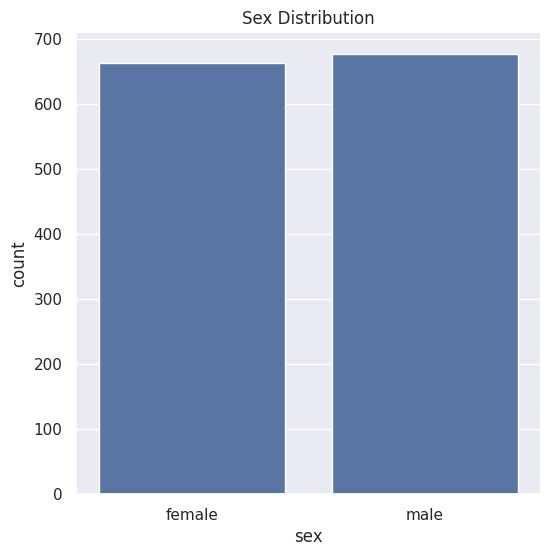

In [22]:
# Gender Column
plt.figure(figsize=(6,6))
sns.countplot(x='sex',data=insurance_dataset)
plt.title('Sex Distribution')
plt.show()

In [23]:
insurance_dataset['sex'].value_counts()

,count
sex,
male,676
female,662


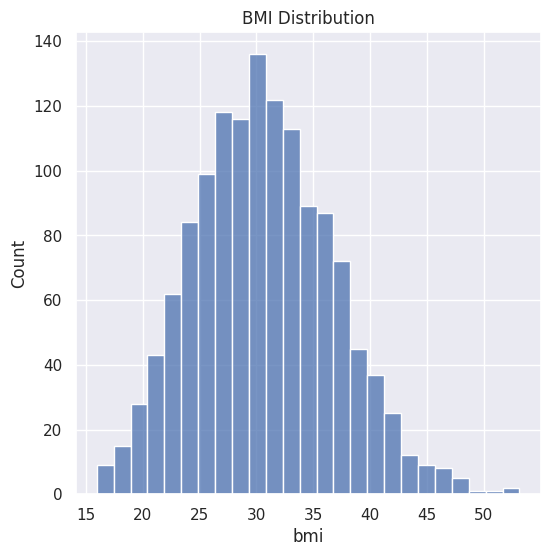

In [48]:
# bmi distribution
plt.figure(figsize=(6,6))
sns.histplot(insurance_dataset['bmi'])
plt.title('BMI Distribution')
plt.show()

Normal BMI range for a person-->18.5 to 24.9

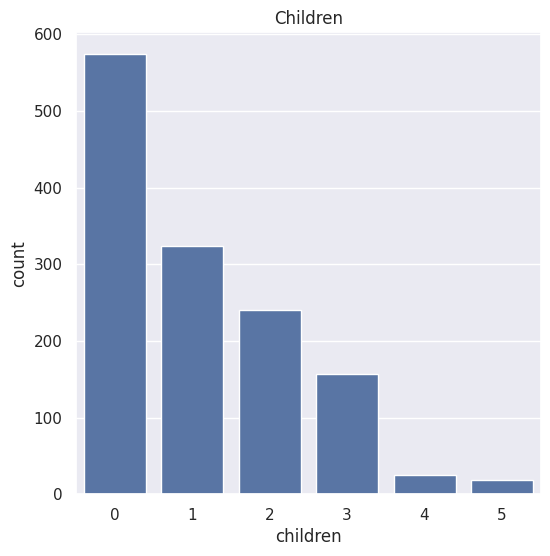

In [25]:
# Childern Column
plt.figure(figsize=(6,6))
sns.countplot(x='children',data=insurance_dataset)
plt.title('Children')
plt.show()

In [26]:
insurance_dataset['children'].value_counts()

,count
children,
0,574
1,324
2,240
3,157
4,25
5,18


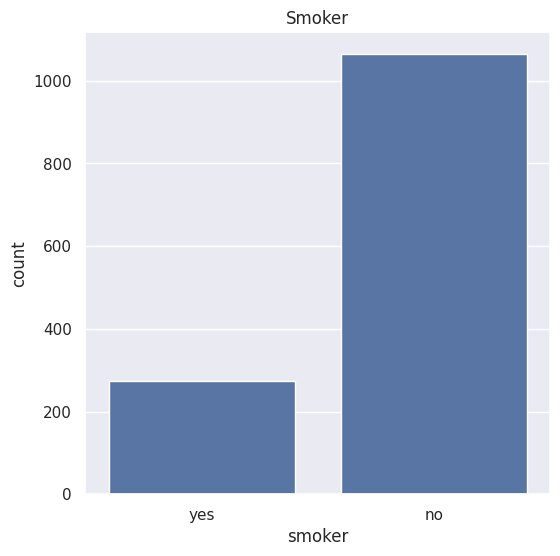

In [27]:
#Smoker Column
plt.figure(figsize=(6,6))
sns.countplot(x='smoker',data=insurance_dataset)
plt.title('Smoker')
plt.show()

In [28]:
insurance_dataset['smoker'].value_counts()

,count
smoker,
no,1064
yes,274


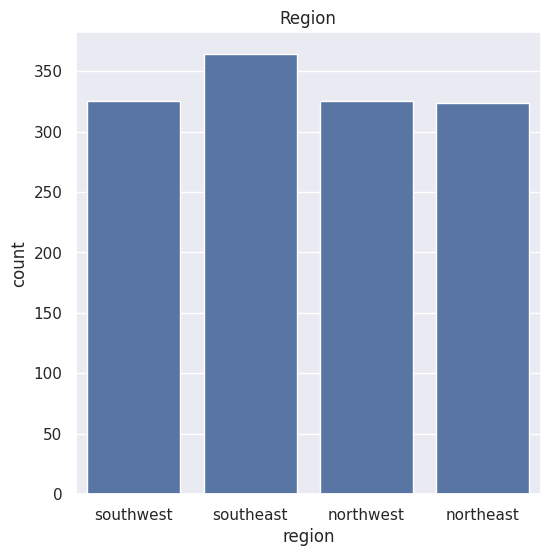

In [29]:
# Region Column
plt.figure(figsize=(6,6))
sns.countplot(x='region',data=insurance_dataset)
plt.title('Region')
plt.show()

In [30]:
insurance_dataset['region'].value_counts()

,count
region,
southeast,364
southwest,325
northwest,325
northeast,324


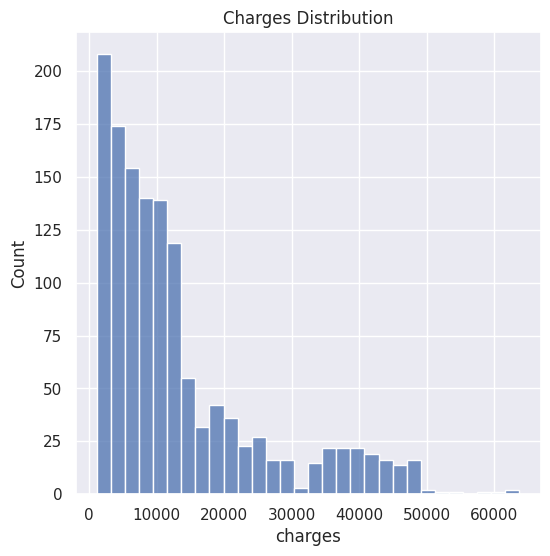

In [49]:
# Distribution of Charges
plt.figure(figsize=(6,6))
sns.histplot(insurance_dataset['charges'])
plt.title('Charges Distribution')
plt.show()

Data Pre-processing

Encoding the Catogerical Process

In [33]:
#encoding the sex column
insurance_dataset.replace({'sex':{'male':1,'female':0}},inplace=True)

#encoding the smoker column
insurance_dataset.replace({'smoker':{'yes':1,'no':0}},inplace=True)

#encoding the region column
insurance_dataset.replace({'region':{'southeast':0,'southwest':1,'northeast':2,'northwest':3}},inplace=True)

Splitting The features and Trget

In [34]:
X=insurance_dataset.drop(columns='charges',axis=1)
Y=insurance_dataset['charges']

In [35]:
print(X)

      age  sex     bmi  children  smoker  region
0      19    0  27.900         0       1       1
1      18    1  33.770         1       0       0
2      28    1  33.000         3       0       0
3      33    1  22.705         0       0       3
4      32    1  28.880         0       0       3
...   ...  ...     ...       ...     ...     ...
1333   50    1  30.970         3       0       3
1334   18    0  31.920         0       0       2
1335   18    0  36.850         0       0       0
1336   21    0  25.800         0       0       1
1337   61    0  29.070         0       1       3

[1338 rows x 6 columns]


In [36]:
print(Y)

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64


Splitting The data Into Trainiing Data ans Testing Data

In [37]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=2)

In [38]:
print(X.shape,X_train.shape,X_test.shape)

(1338, 6) (1070, 6) (268, 6)


Model Training

In [39]:
# loading the linear regression model
regressor = LinearRegression()

In [40]:
regressor.fit(X_train,Y_train)

LinearRegression()

Model Evaluation

In [41]:
#prediction on training Data
training_data_prediction =regressor.predict(X_train)

In [42]:
# R squared value
r2_train = metrics.r2_score(Y_train , training_data_prediction)
print('R squared vale:', r2_train)

R squared vale: 0.751505643411174


In [43]:
test_data_prediction =regressor.predict(X_test)

In [44]:
#prediction on training Data
r2_test = metrics.r2_score(Y_test , test_data_prediction)
print('R squared vale:', r2_train)

R squared vale: 0.751505643411174


Building a predictive System

In [46]:
input_data=(46,1,33.44,1,1,0)

#changing input_data to a numpy array
input_data_as_numpy_array =np.asarray(input_data)

#reshape the array
input_data_reshaped=input_data_as_numpy_array.reshape(1,-1)
columns = X_train.columns
input_data_df = pd.DataFrame(input_data_reshaped, columns=columns)
prediction=regressor.predict(input_data_df)
print(prediction)

print('The insurance cost is USD', prediction [0])

[34559.39340087]
The insurance cost is USD 34559.393400873545
